# 5장. 참 거짓 판단 장치: 로지스틱 회귀

- 로지스틱 회귀: 참과 거짓 중에 하나를 내놓는 과정 <br>
참인지 거짓인지 구분하는 로지스틱 회귀의 원리를 이용해 '참, 거짓 미니 판단 장치'를 만들어 주어진 입력 값의 특징을 추출하고 저장해 '모델'을 만들어 냄. <br>
비슷한 질문에 이 모델을 꺼내어 답을 하는 것이 딥러닝의 동작 원리.

<hr>

## 1. 로지스틱 회귀의 정의

로지스틱 회귀는 선형 회귀와 마찬가지로 적절한 선을 그려가는 과정임. <br>
다만, 직선이 아니라, 참(1)과 거짓(0) 사이를 구분하는 S자 형태의 선을 그어 주는 작업임.

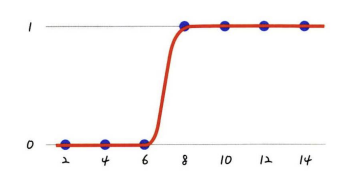

<hr>

# 2. 시그모이드 함수

시그모이드 함수를 이용해 로지스틱 회귀를 풀어나가는 공식 <br>
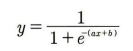

우리가 구해야 하는 값: ax + b <br>
a는 그래프의 경사도를 결정, b는 그래프의 좌우 이동을 의미함

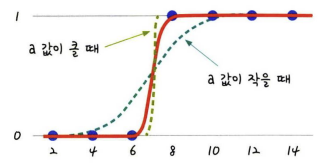

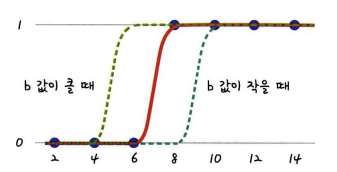

a값이 커지면 경사가 커지고, a값이 작아지면 경사가 작아짐. <br>
b값이 크고 작아짐에 따라 그래프가 이동함. <br>
따라서 a와 b의 값에 따라 오차가 변함

a와 오차와의 관계: a가작아질수록 오차는 무한대로 커지지만, a가 커진다고 해서 오차가 없어지지는 않는다

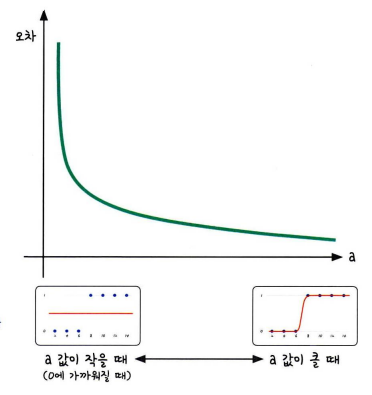

b와 오차와의 관계: b값이 너무 작아지거나 커지면 오차도 이에 따라 커진다.

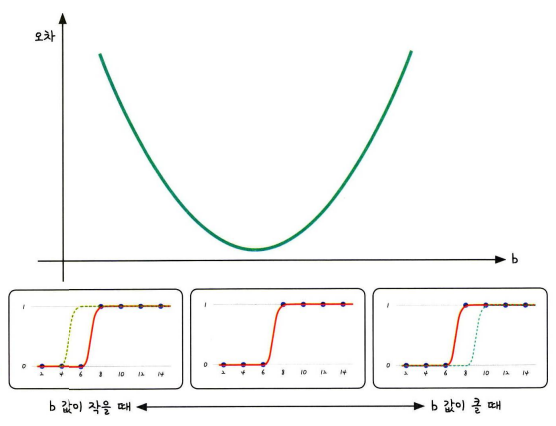

<hr>

## 3. 오차 공식

시그모이드 함수에서 a와 b의 값을 구하는 방법은 경사하강법을 이용하는 것

경사하강법: 먼저 오차를 구한 다음 오차가 작은 쪽으로 이동시키는 방법<br>
예측 값과 실제 값의 차이, 즉 오차를 구하는 공식이 필요함

시그모이드 함수의 특징: y값이 0과 1 사이라는 것<br>
따라서 실제 값이 1일 때, 예측 값이 0에 가까워지면 오차가 커짐.
반대로, 실제 값이 0일 때 예측 값이 1에 가까워져도 오차는 커짐.
-> 이를 공식으로 만들 수 있게 해 주는 함수가 로그함수임

<hr>

## 4. 로그 함수

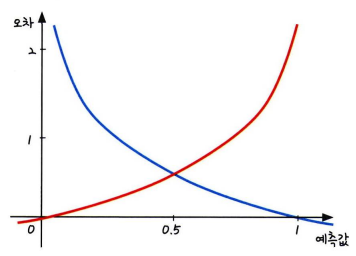

파란색 선은 실제 값이 1일 때 사용 가능 <br>
예측 값이 1일 때 오차가 0이고, 반대로 예측 값이 0에 가까울수록 오차는 커짐. <br>
파란색 그래프 식: -logh

빨간색 선은 실제 값이 0일 때 사용 가능 <br>
예측 값이 0일 때 오차가 없고, 1에 가까워질수록 오차가 매우 커짐 <br>
빨간색 그래프 식: -log(1-h)

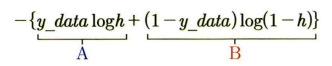

실제 값을 y_data라 할 때, 이 값이 1이면 B 부분이 없어짐. <br>
반대로 0이면 A 부분이 없어짐.

<hr>

## 5. 코딩으로 확인하는 로지스틱 회귀

로지스틱 회귀를 위해서는 시그모이드 함수를 사용해야 하는데, 0부터 1사이의 값을 가지는 특성 때문에 로그함수를 함께 써야 함.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 공부 시간 x와 합격 여부 y의 리스트 만들기
data=[[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]

x_data=[i[0] for i in data] # 공부한 시간 데이터
y_data=[i[1] for i in data] # 합격 여부

C:\Users\권효정\AppData\Local\Temp\ipykernel_13316\1095962923.py:4: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-1,1,1)


(-1.0, 1.0)

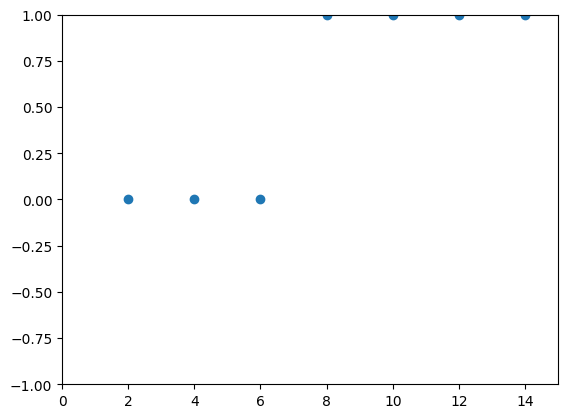

In [4]:
# 그래프로 나타내기
plt.scatter(x_data,y_data)
plt.xlim(0,15)
plt.ylim(-1,1,1)

In [5]:
# 기울기 a와 절편 b의 값 초기화
a=0 # 기울기 a값 초기화
b=0 # 절편 b의 값 초기화

lr=0.05 # 학습률

In [6]:
# 시그모이드 함수 정의
def sigmoid(x): # sigmoid라는 이름의 함수 정의
  return 1/(1+np.e**(-x)) # 시그모이드 식의 형태 그대로 파이썬으로 옮김

로지스틱 회귀의 오차 함수
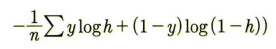

epoch=0, 기울기=-0.0500, 절편=-0.0250
epoch=0, 기울기=-0.1388, 절편=-0.0472
epoch=0, 기울기=-0.2268, 절편=-0.0619
epoch=0, 기울기=0.1201, 절편=-0.0185
epoch=0, 기울기=0.2374, 절편=-0.0068
epoch=0, 기울기=0.2705, 절편=-0.0040
epoch=0, 기울기=0.2860, 절편=-0.0029


C:\Users\권효정\AppData\Local\Temp\ipykernel_13316\118884209.py:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-1,1,1)


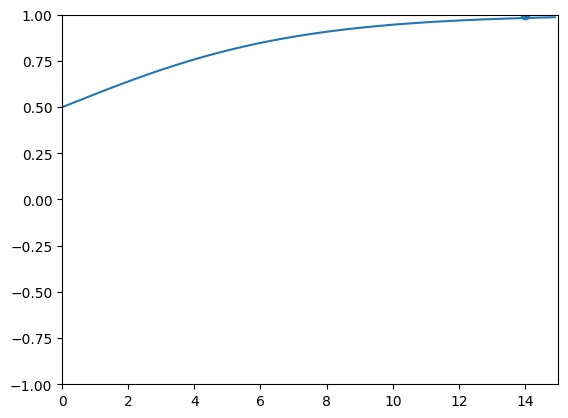

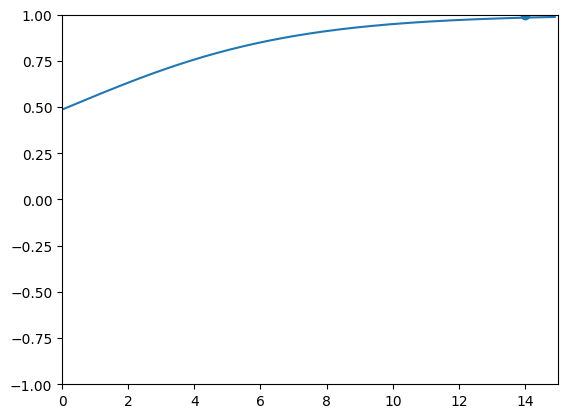

KeyboardInterrupt: 

In [7]:
# 경사 하강법 실행

# 1,000번 반복될 때마다 각 x_data 값에 대한 현재의 a값, b값 출력
for i in range(2001):
  for x_data, y_data in data:
    a_diff=x_data*(sigmoid(a*x_data+b)-y_data) # a에 관한 편미분, 앞서 정의한 sigmoid 함수 사용
    b_diff=sigmoid(a*x_data+b)-y_data # b에 관한 편미분
    a=a-lr*a_diff # a를 업데이트 하기 위해 a_diff에 학습률을 곱한 값을 a에서 뺌
    b=b-lr*b_diff # b를 업데이트 하기 위해 b_diff에 학습률 lr을 곱한 값을 b에서 뺌

    if i%1000==0:
      print("epoch=%.f, 기울기=%.04f, 절편=%.04f"%(i,a,b))


# 앞서 구한 기울기와 절편을 이용해 그래프 그리기
  plt.scatter(x_data,y_data)
  plt.xlim(0,15)
  plt.ylim(-1,1,1)
  x_range=(np.arange(0,15,0.1)) # 그래프로 나타낼 x값의 범위 정하기
  plt.plot(np.arange(0,15,0.1),np.array([sigmoid(a*x+b) for x in x_range]))
  plt.show()

### ( 깃허브에 업로드가 안돼서 중간에 실행을 임의로 중단시켰습니당 )

만약 여기에 입력 값이 추가되어 세 개 이상의 입력 값을 다룬다면 시그모이드 함수가 아니라 소프트맥스라는 함수를 써야함.

<hr>

## 6. 로지스틱 회귀에서 퍼셉트론으로

y= a1x1 + a2x2 + b <br>
x1, x2: 입력 값 <br>
계산으로 얻는 값 y: 출력 값

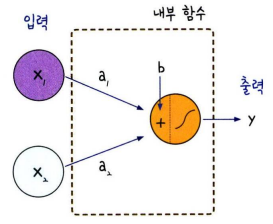